In [1]:
# import warnings filter
from warnings import simplefilter
import warnings
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np
import ast
from itertools import combinations, product
from sklearn import manifold
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import TweetTokenizer
import textblob
import re

In [3]:
df = pd.read_csv("output_locations_temp.csv")

In [4]:
#Get the tweets
#Get the frequency of the countries mentioned
df.head()

,id,username,text,retweets,favorites,replies,permalink,date,mentions,hashtags,cities,countries
0,1200516560160481280,vanderfullife,Pan Pacific Airlines adds Clark – Muan route f...,0,0,0,https://twitter.com/vanderfullife/status/12005...,2019-11-29 20:47:07+00:00,NaN,#news #today #travel #vacation #cruise #holida...,['Muan'],NaN
1,1200515578215174145,neilwalkerwrote,This #action-packed #crime #thriller is set ov...,0,0,0,https://twitter.com/neilwalkerwrote/status/120...,2019-11-29 20:43:13+00:00,NaN,#action #crime #thriller #Christmas #newyear #...,['Walker'],NaN
2,1200515516986736641,g2g_apparel,@FounDAYtionPrints will be showcasing these ba...,0,0,0,https://twitter.com/g2g_apparel/status/1200515...,2019-11-29 20:42:58+00:00,@FounDAYtionPrints,#PHILLY #homedecor #shopping #soakingtub #bath...,"['Buy', 'Pop']",NaN
3,1200515146294022144,Bareteri,Campo S. Polo oggi... Il segnale più evidente ...,0,0,0,https://twitter.com/Bareteri/status/1200515146...,2019-11-29 20:41:30+00:00,NaN,#natale #venezia #venice #mylove #veniceitaly ...,['Venice'],NaN
4,1200515027280596992,XanderGlyphShow,I did not participate in the the turkey eating...,0,0,0,https://twitter.com/XanderGlyphShow/status/120...,2019-11-29 20:41:01+00:00,NaN,#happy #holidays #everyone,NaN,['Turkey']


In [85]:
tknzr = TweetTokenizer()
no_null_values_cities = df["cities"].dropna()
no_null_values_countries = df["countries"].dropna()

In [48]:
convert_to_array(df["cities"].iloc[0])[0].strip()

"'Muan'"

In [86]:
destinations = df.iloc[no_null_values_cities.index]
destinations_countries = df.iloc[no_null_values_countries.index]

In [8]:
def convert_to_array(val):
    str1 = val.replace(']','').replace('[','')
    l = str1.split(",")
    return l

In [9]:
#let's remove stop words from the tweet token
stop_words = set(stopwords.words('english')) 

In [139]:
def splitter(data):
    new_data = []
    for word in data:    
        word = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",word)
        new_data.append(textblob.Word(word.strip()).lemmatize())
    return new_data

In [11]:
def remove_stop_words(word_tokens):   
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return filtered_sentence

In [87]:
destinations['Tweet_Token'] = destinations['text'].apply(lambda x: tknzr.tokenize(x))
destinations.head()


,id,username,text,retweets,favorites,replies,permalink,date,mentions,hashtags,cities,countries,Tweet_Token
0,1200516560160481280,vanderfullife,Pan Pacific Airlines adds Clark – Muan route f...,0,0,0,https://twitter.com/vanderfullife/status/12005...,2019-11-29 20:47:07+00:00,NaN,#news #today #travel #vacation #cruise #holida...,['Muan'],NaN,"[Pan, Pacific, Airlines, adds, Clark, –, Muan,..."
1,1200515578215174145,neilwalkerwrote,This #action-packed #crime #thriller is set ov...,0,0,0,https://twitter.com/neilwalkerwrote/status/120...,2019-11-29 20:43:13+00:00,NaN,#action #crime #thriller #Christmas #newyear #...,['Walker'],NaN,"[This, #action-packed, #crime, #thriller, is, ..."
2,1200515516986736641,g2g_apparel,@FounDAYtionPrints will be showcasing these ba...,0,0,0,https://twitter.com/g2g_apparel/status/1200515...,2019-11-29 20:42:58+00:00,@FounDAYtionPrints,#PHILLY #homedecor #shopping #soakingtub #bath...,"['Buy', 'Pop']",NaN,"[@FounDAYtionPrints, will, be, showcasing, the..."
3,1200515146294022144,Bareteri,Campo S. Polo oggi... Il segnale più evidente ...,0,0,0,https://twitter.com/Bareteri/status/1200515146...,2019-11-29 20:41:30+00:00,NaN,#natale #venezia #venice #mylove #veniceitaly ...,['Venice'],NaN,"[Campo, S, ., Polo, oggi, ..., Il, segnale, pi..."
5,1200514542700130304,pagejeter,Family walk. #venicecanals #thanksgiving #holi...,0,0,0,https://twitter.com/pagejeter/status/120051454...,2019-11-29 20:39:06+00:00,@Venice,#venicecanals #thanksgiving #holidays #venice ...,['Venice'],NaN,"[Family, walk, ., #venicecanals, #thanksgiving..."


In [88]:

#destinations["Tweet_Token"] = destinations["Tweet_Token"].apply(lambda x: convert_to_array(x))
destinations["Tweet_Token_Stop_Words"] = destinations["Tweet_Token"].apply(lambda x: remove_stop_words(x))
destinations["Tweet_Token_Stop_Words"] = destinations["Tweet_Token_Stop_Words"].apply(lambda x: splitter(x))

In [89]:
destinations["cities"] = destinations["cities"].apply(lambda x: convert_to_array(x))

In [90]:
def strip_quotes(words):
    b = []
    for i in words:
        b.append(i.strip())
    return b
destinations["cities_strip"] = destinations["cities"].apply(lambda x: strip_quotes(x))

In [91]:
destinations.head()

,id,username,text,retweets,favorites,replies,permalink,date,mentions,hashtags,cities,countries,Tweet_Token,Tweet_Token_Stop_Words,cities_strip
0,1200516560160481280,vanderfullife,Pan Pacific Airlines adds Clark – Muan route f...,0,0,0,https://twitter.com/vanderfullife/status/12005...,2019-11-29 20:47:07+00:00,NaN,#news #today #travel #vacation #cruise #holida...,['Muan'],NaN,"[Pan, Pacific, Airlines, adds, Clark, –, Muan,...","[pan, pacific, airline, add, clark, , muan, ro...",['Muan']
1,1200515578215174145,neilwalkerwrote,This #action-packed #crime #thriller is set ov...,0,0,0,https://twitter.com/neilwalkerwrote/status/120...,2019-11-29 20:43:13+00:00,NaN,#action #crime #thriller #Christmas #newyear #...,['Walker'],NaN,"[This, #action-packed, #crime, #thriller, is, ...","[this, action packed, crime, thriller, set, ch...",['Walker']
2,1200515516986736641,g2g_apparel,@FounDAYtionPrints will be showcasing these ba...,0,0,0,https://twitter.com/g2g_apparel/status/1200515...,2019-11-29 20:42:58+00:00,@FounDAYtionPrints,#PHILLY #homedecor #shopping #soakingtub #bath...,"['Buy', 'Pop']",NaN,"[@FounDAYtionPrints, will, be, showcasing, the...","[, showcasing, bathtub, tray, 12 8, buy, black...","['Buy', 'Pop']"
3,1200515146294022144,Bareteri,Campo S. Polo oggi... Il segnale più evidente ...,0,0,0,https://twitter.com/Bareteri/status/1200515146...,2019-11-29 20:41:30+00:00,NaN,#natale #venezia #venice #mylove #veniceitaly ...,['Venice'],NaN,"[Campo, S, ., Polo, oggi, ..., Il, segnale, pi...","[campo, s, , polo, oggi, , il, segnale, pi, ev...",['Venice']
5,1200514542700130304,pagejeter,Family walk. #venicecanals #thanksgiving #holi...,0,0,0,https://twitter.com/pagejeter/status/120051454...,2019-11-29 20:39:06+00:00,@Venice,#venicecanals #thanksgiving #holidays #venice ...,['Venice'],NaN,"[Family, walk, ., #venicecanals, #thanksgiving...","[family, walk, , venicecanals, thanksgiving, h...",['Venice']


In [92]:
same_map = {
        'adventure': ["experience","tourism","tourist","discover","traveltheworld","sightseeing","skiing","adventurepic"],
        'scenery': ["beautiful","paradise","island","stunning","waterfall","scenic","garden","nature","beach","beachvacation","naturelover","reconnectwithnature"],
        'luxury':["luxurytravel","resort","luxurypic","luxurious"],
        'relaxation' :["hospitality","comfort","spa","recreation","leisure"],
        'family' :["disney",'familytimepic',"familytrip","familypic","familytime","familytravel"],
        'romantic' :["forher","forhim","engagement","lovepic","weddingplanner","weddinginspiration","weddingstationery","lovetravel","lover","romance","dateideashttps","dateideas","dateideashttp"]
}

In [148]:
top_attributes = ["adventure","scenery","luxury","relaxation","family","romantic"]

In [93]:
same_inv_map = {word: root for root, words in same_map.items() for word in words}

In [94]:
def convert_same_all(words):
    return [convert_same(word) for word in words]

def convert_same(word):
    return same_inv_map[word] if word in same_inv_map else word

In [95]:
destinations['replace_tweet'] = destinations['Tweet_Token_Stop_Words'].map(convert_same_all)

In [96]:
def word_freq(word_list):
    word_map = {}
    for a in word_list:
        for word in a:
            if word in word_map:
                word_map[word] += 1
            else:
                word_map.update({word : 1})
    return sorted(word_map.items(), key=lambda kv: kv[1],reverse=True)

In [97]:
word_freq(destinations["replace_tweet"])

[('', 29579),
 ('travel', 3406),
 ('vacation', 3179),
 ('holiday', 3169),
 ('adventure', 2305),
 ('destination', 2101),
 ('getaway', 1988),
 ('hotel', 1543),
 ('tour', 1541),
 ('scenery', 1221),
 ('flight', 1126),
 ('weekend', 929),
 ('photography', 861),
 ('deal', 824),
 ('escape', 769),
 ('the', 747),
 ('english', 723),
 ('local', 695),
 ('trip', 573),
 ('best', 570),
 ('luxury', 545),
 ('cruise', 510),
 ('london', 472),
 ('family', 450),
 ('new', 432),
 ('private', 431),
 ('sale', 415),
 ('christmas', 411),
 ('news', 401),
 ('thanksgiving', 401),
 ('traveller', 397),
 ('scotland', 374),
 ('day', 353),
 ('u', 343),
 ('city', 332),
 ('book', 304),
 ('traveling', 293),
 ('i', 290),
 ('bali', 278),
 ('blog', 273),
 ('today', 262),
 ('time', 261),
 ('blackfriday', 251),
 ('photo', 245),
 ('travelling', 240),
 ('visit', 230),
 ('win', 229),
 ('love', 228),
 ('romantic', 224),
 ('happy', 219),
 ('a', 219),
 ('hoteldeals', 217),
 ('wanderlust', 213),
 ('edinburgh', 210),
 ('custom', 210),
 

In [140]:
top_cities = ["london","bali","york","florida","dubai","mexico","miami","paris","jamaica","toronto","singapore","oxford","chicago","orlando"]

In [141]:
# Calculation of lift scores. Code Gotten from project 1
def do_lift(x, y=None):
    l1, l2 = sorted(x), sorted(y or [])
    bools = pd.DataFrame()
    for e in l1 + l2:
        bools[e] = destinations['replace_tweet'].map(lambda words: e in words)

    def do(df, a, b):
        count_a_int_b = np.logical_and(df[a], df[b]).values.sum()
        count_a_mult_count_b = df[a].values.sum() * df[b].values.sum()
        return len(df.index) * count_a_int_b / count_a_mult_count_b

    result_df = pd.DataFrame(index=l1, columns=(l2 or l1))
    for a, b in (combinations(l1, 2) if y==None else product(l1, l2)):
        val = do(bools, a, b)
        result_df.at[a, b] = val
        if y==None:
            result_df.at[b, a] = val

    return result_df

In [142]:
top_destination_cities = do_lift(top_cities)
topDestinationsList = list(top_destination_cities.columns)

In [143]:
top_destination_cities

,bali,chicago,dubai,florida,jamaica,london,mexico,miami,orlando,oxford,paris,singapore,toronto,york
bali,NaN,0,0,0,0,0,0.240424,0,0,0,0,2.44431,0,0
chicago,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0
dubai,0,0,NaN,0,0.832106,0.152357,0.532002,0,0,0,0.791515,0,0,0
florida,0,0,0,NaN,0,0,0.367707,22.7862,4.77237,0,0,0,0,0
jamaica,0,0,0.832106,0,NaN,0,0.641131,1.24155,0,0,1.90775,0,0,0
london,0,0,0.152357,0,0,NaN,0.11739,0.227327,0,2.01005,1.22258,0,2.67013,0.114573
mexico,0.240424,0,0.532002,0.367707,0.641131,0.11739,NaN,0,3.19201,0,0,0,9.32356,0.400066
miami,0,0,0,22.7862,1.24155,0.227327,0,NaN,0,0,1.18099,0,0,0
orlando,0,0,0,4.77237,0,0,3.19201,0,NaN,0,0,0,0,0
oxford,0,0,0,0,0,2.01005,0,0,0,NaN,1.30531,0,0,0


In [159]:
#Lets take care of the 0 scores by padding the lift values by 0.5
floatdf = top_destination_cities.astype(float)
floatdf = floatdf.add(0.5)
np.fill_diagonal(floatdf.values, 0)

In [160]:
dissimilarity_matrix = (1/floatdf).astype(float)
np.fill_diagonal(dissimilarity_matrix.values, 0)

In [146]:
# Plotting MDS plot
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(dissimilarity_matrix)
coords = results.embedding_

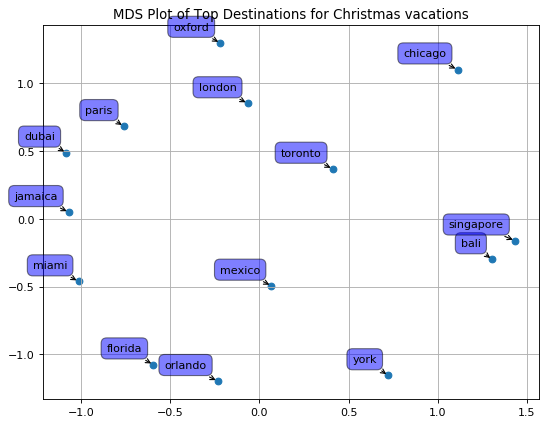

In [147]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1], marker = 'o')

for label, x, y in zip(topDestinationsList, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.title('MDS Plot of Top Destinations for Christmas vacations')
plt.grid()
plt.show()

In [161]:
attributes_lift = do_lift( top_cities + top_attributes)
attributes_lift_col = list(attributes_lift.columns)

In [152]:
#Lets take care of the 0 scores by padding the lift values by 0.5
floatdf_attr = attributes_lift.astype(float)
floatdf_attr = floatdf_attr.add(0.5)
np.fill_diagonal(floatdf_attr.values, 0)

In [154]:
dissimilarity_matrix = (1/floatdf_attr).astype(float)
np.fill_diagonal(dissimilarity_matrix.values, 0)

In [155]:
# Plotting MDS plot
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(dissimilarity_matrix)
coords = results.embedding_

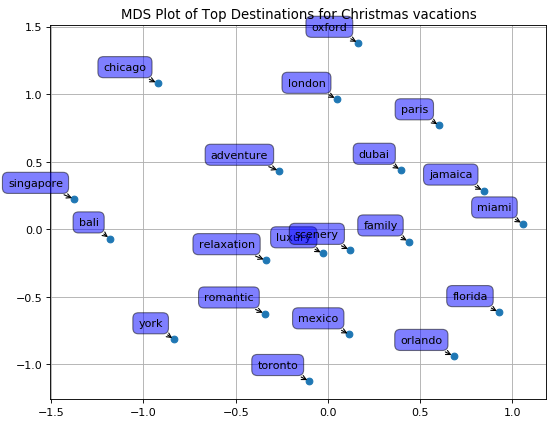

In [158]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1], marker = 'o')

for label, x, y in zip(attributes_lift_col, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.title('MDS Plot of Top Destinations for Christmas vacations')
plt.grid()
plt.show()